## Train a model with bike rental data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
# !conda install -y -c conda-forge xgboost
# !pip install xgboost==0.90

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [3]:
## load the data
from google.colab import files
uploaded = files.upload()

Saving rob_bike_test.csv to rob_bike_test (2).csv
Saving rob_bike_train.csv to rob_bike_train (2).csv
Saving rob_bike_train_column_list.txt to rob_bike_train_column_list (2).txt
Saving rob_bike_validation.csv to rob_bike_validation (2).csv


In [4]:
## check for columns name
column_list_file = 'rob_bike_train_column_list.txt'
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [5]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv('rob_bike_train.csv', names=columns)
display(df_train.head())

df_validation = pd.read_csv('rob_bike_validation.csv', names=columns)
display(df_validation.head())

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [6]:
## Preparing Independent features and dependent feature
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

display(X_train.head(3))
## XGBoost accepts target variable in first column

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17


In [7]:
## Hyperparameter Optimization
params = {}
params['learning_rate'] = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
params['max_depth'] = [3, 4, 5, 6, 8, 10, 12, 15]
params['min_child_weight'] = [1, 3, 5, 7]
params['gamma'] = [0, 0.1, 0.2, 0.3, 0.4]
params['colsample_bytree'] = [0.3, 0.4, 0.5, 0.7]
params

{'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'gamma': [0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7]}

In [8]:
## Search  CV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [9]:
regressor = xgb.XGBRegressor()

In [10]:
##
random_search = RandomizedSearchCV(regressor, param_distributions = params, n_iter = 5, cv = 5, n_jobs=-1, verbose=3)
random_search

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs

In [11]:
##
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.8s finished


[07:17:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs

In [12]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning_rate': 0.25,
 'max_depth': 5,
 'min_child_weight': 7}

In [13]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [14]:
# # XGBoost Training Parameter Reference: 
# #   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
# #regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
# regressor = xgb.XGBRegressor(max_depth=5, n_estimators=150)
# regressor

In [15]:
regressor = xgb.XGBRegressor(colsample_bytree= 0.7, 
                             gamma = 0.3, 
                             learning_rate = 0.05,
                             max_depth = 12,
                             min_child_weight = 5)
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [16]:
## Aprroximation target variable by training on train data
regressor.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[07:17:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.12734	validation_1-rmse:4.13948
[1]	validation_0-rmse:3.92625	validation_1-rmse:3.9385
[2]	validation_0-rmse:3.73399	validation_1-rmse:3.74564
[3]	validation_0-rmse:3.56317	validation_1-rmse:3.57481
[4]	validation_0-rmse:3.38916	validation_1-rmse:3.40047
[5]	validation_0-rmse:3.22373	validation_1-rmse:3.23479
[6]	validation_0-rmse:3.06642	validation_1-rmse:3.07726
[7]	validation_0-rmse:2.91708	validation_1-rmse:2.92758
[8]	validation_0-rmse:2.78545	validation_1-rmse:2.79601
[9]	validation_0-rmse:2.64985	validation_1-rmse:2.66044
[10]	validation_0-rmse:2.5216	validation_1-rmse:2.53177
[11]	validation_0-rmse:2.39973	validation_1-rmse:2.40975
[12]	validation_0-rmse:2.29301	validation_1-rmse:2.30437
[13]	validation_0-rmse:2.19166	validation_1-rmse:2.20422
[14]	validation_0-rmse:2.08606	validation_1-rmse:2.09897
[15]	validation_0-rmse:1.98583

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=12, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [17]:
## Summary statistics of target variable
df_train['count'].describe()

count    7620.000000
mean        4.583886
std         1.429959
min         0.693147
25%         3.737670
50%         4.976734
75%         5.652489
max         6.885510
Name: count, dtype: float64

In [18]:
## Result after training on train set
eval_result = regressor.evals_result()
# print(eval_result)

Length of Training Rounds (or Iteration):  range(0, 100)


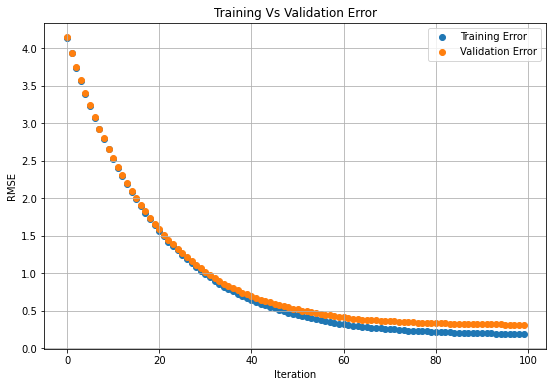

In [19]:
### Plotting "training error" vs. "validation error" -- to check model performance
## No.of Iterations
training_rounds = range(len(eval_result['validation_0']['rmse']))
print("Length of Training Rounds (or Iteration): ", training_rounds)

## plot
plt.figure(figsize=(9,6))
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

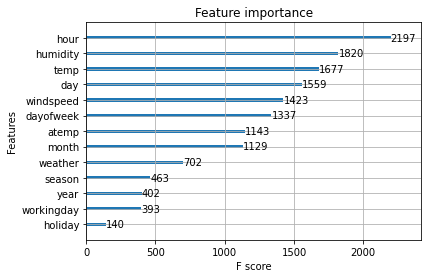

In [20]:
## Feature importance
xgb.plot_importance(regressor)
plt.show()

## Note: "hour is the most important features", also 
# "humidty", "temperature", "day" plays important role

## Prediction validation dataset --- test for this case

In [21]:
# Updated - Changed to validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df_test = pd.read_csv("rob_bike_validation.csv", names=columns)
df_test.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [22]:
## Input features from validation dataset 
# 
X_test = df_test.iloc[:,1:] ## This features will be feed into trained model to predict bike rental count
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [23]:
## Prediction on test data
result = regressor.predict(X_test)
result[:5]

array([5.9130645, 5.9033074, 1.921664 , 3.8877373, 4.122123 ],
      dtype=float32)

In [24]:
## Let's add predicted count column to the test dataframe
df_test['pred_count'] = result

## check test data now
df_test.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,pred_count
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,5.913064
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,5.903307
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,1.921664
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,3.887737
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,4.122123


In [25]:
## Inverse the log transformation to get the exact bike rental
df_test['count'] = df_test['count'].map(np.expm1)
df_test['pred_count'] = df_test['pred_count'].map(np.expm1)

In [26]:
# Summary Statistics of predicted bike rental counts
df_test['pred_count'].describe()

count    3266.000000
mean      172.525863
std       155.398775
min         1.257058
25%        42.730655
50%       134.960257
75%       258.211064
max       787.705497
Name: pred_count, dtype: float64

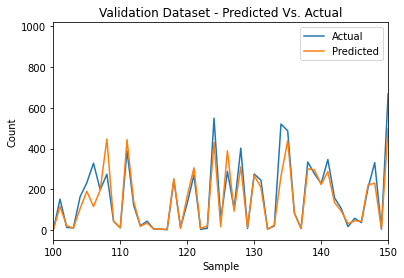

In [27]:
# Actual vs Predicted
plt.plot(df_test['count'], label='Actual')
plt.plot(df_test['pred_count'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

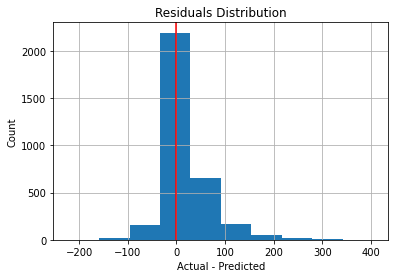

In [28]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df_test['count'] - df_test['pred_count'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [29]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.61
 Over  Estimation: 0.39


In [30]:
### Model Evaluation
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df_test['count'],
                                                    df_test['pred_count'])**.5))

RMSE: 52.80


In [31]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [32]:
print("RMSLE: {0:.2f}".format(compute_rmsle(df_test['count'], df_test['pred_count'])))

RMSLE: 0.32


### Prepare Data for Submission to Kaggle

In [33]:
# Prepare Data for Submission to Kaggle
df_org_test = pd.read_csv("rob_bike_test.csv", parse_dates=['datetime'])
df_org_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [34]:
test_X =  df_org_test.iloc[:,1:] # Exclude datetime for prediction
test_X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [35]:
## Prediction original test data
result = regressor.predict(test_X)
print(result[:5])

## Inverse the log transformation
np.expm1(result)

[2.634727  1.8896197 1.7664896 1.4329822 1.291976 ]


array([ 12.939507,   5.616852,   4.850281, ..., 112.21899 ,  85.674866,
        61.782482], dtype=float32)

In [36]:
# Convert result to actual count
df_org_test["count"] = np.expm1(result)
df_org_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,12.939507
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,5.616852
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,4.850281
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,3.191180
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,2.639972


In [37]:
## check if count is less than 0-- which is not possible in real life
df_org_test[df_org_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [38]:
df_org_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [39]:
sub = pd.read_csv("predicted_count.csv")
sub.head()

,datetime,count
0,2011-01-20 00:00:00,12.939507
1,2011-01-20 01:00:00,5.616852
2,2011-01-20 02:00:00,4.850281
3,2011-01-20 03:00:00,3.191179
4,2011-01-20 04:00:00,2.639972


In [40]:
# RMSLE (Kaggle) Score
# Test 1: 0.62
# Test 2(log of count): 0.32